## Data Visualization and Transformation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import time

In [4]:
df=pd.read_csv('IoT_Intrusion.csv')
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [5]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [6]:
df.iloc[1,:]

flow_duration                0.0
Header_Length              57.04
Protocol Type               6.33
Duration                    64.0
Rate                    4.290556
Srate                   4.290556
Drate                        0.0
fin_flag_number                0
syn_flag_number                0
rst_flag_number                0
psh_flag_number                0
ack_flag_number                0
ece_flag_number                0
cwr_flag_number                0
ack_count                    0.0
syn_count                    0.0
fin_count                    0.0
urg_count                    0.0
rst_count                    0.0
HTTP                           1
HTTPS                          0
DNS                            0
Telnet                         0
SMTP                           0
SSH                            0
IRC                            0
TCP                            1
UDP                            0
DHCP                           0
ARP                            0
ICMP      

In [7]:
label_count=df['label'].value_counts()
label_count

label
DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
MITM-ArpSpoofing             7019
DDoS-ACK_Fragmentation       6431
DDoS-UDP_Fragmentation       6431
DNS_Spoofing                 4034
Recon-HostDiscovery          3007
Recon-OSScan                 2225
Recon-PortScan               1863
DoS-HTTP_Flood               1680
VulnerabilityScan             809
DDoS-HTTP_Flood               626
DDoS-SlowLoris                493
DictionaryBruteForce          324
BrowserHijacking              140
SqlInjection                  122
CommandI

In [8]:
df.shape

(1048575, 47)

In [9]:
label_list=label_count.index

In [10]:
label_list

Index(['DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-SYN_Flood', 'DDoS-RSTFINFlood',
       'DDoS-SynonymousIP_Flood', 'DoS-UDP_Flood', 'DoS-TCP_Flood',
       'DoS-SYN_Flood', 'BenignTraffic', 'Mirai-greeth_flood',
       'Mirai-udpplain', 'Mirai-greip_flood', 'DDoS-ICMP_Fragmentation',
       'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation', 'DDoS-UDP_Fragmentation',
       'DNS_Spoofing', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan',
       'DoS-HTTP_Flood', 'VulnerabilityScan', 'DDoS-HTTP_Flood',
       'DDoS-SlowLoris', 'DictionaryBruteForce', 'BrowserHijacking',
       'SqlInjection', 'CommandInjection', 'Backdoor_Malware', 'XSS',
       'Recon-PingSweep', 'Uploading_Attack'],
      dtype='object', name='label')

In [11]:
final_label_list=[]
for x in label_list:
    if 'DoS' in x and label_count[x]>10000:
        final_label_list.append(x)
    elif 'Benign' in x:
        final_label_list.append(x)
    elif 'Mirai' in x:
        final_label_list.append(x)

final_label_list

['DDoS-ICMP_Flood',
 'DDoS-UDP_Flood',
 'DDoS-TCP_Flood',
 'DDoS-PSHACK_Flood',
 'DDoS-SYN_Flood',
 'DDoS-RSTFINFlood',
 'DDoS-SynonymousIP_Flood',
 'DoS-UDP_Flood',
 'DoS-TCP_Flood',
 'DoS-SYN_Flood',
 'BenignTraffic',
 'Mirai-greeth_flood',
 'Mirai-udpplain',
 'Mirai-greip_flood',
 'DDoS-ICMP_Fragmentation']

In [12]:
df1=df[df['label'].isin(final_label_list)].copy()
df1.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [13]:
df1.shape

(1013054, 47)

In [14]:
df1['label'].value_counts()

label
DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
Name: count, dtype: int64

In [15]:
label_rename={}
for x in final_label_list:
    if 'DDoS' in x:
        label_rename[x]='DDoS'
    elif 'DoS' in x:
        label_rename[x]='DoS'
    elif 'Mirai' in x:
        label_rename[x]='Mirai'
    else:
        label_rename[x]='Benign'
label_rename

{'DDoS-ICMP_Flood': 'DDoS',
 'DDoS-UDP_Flood': 'DDoS',
 'DDoS-TCP_Flood': 'DDoS',
 'DDoS-PSHACK_Flood': 'DDoS',
 'DDoS-SYN_Flood': 'DDoS',
 'DDoS-RSTFINFlood': 'DDoS',
 'DDoS-SynonymousIP_Flood': 'DDoS',
 'DoS-UDP_Flood': 'DoS',
 'DoS-TCP_Flood': 'DoS',
 'DoS-SYN_Flood': 'DoS',
 'BenignTraffic': 'Benign',
 'Mirai-greeth_flood': 'Mirai',
 'Mirai-udpplain': 'Mirai',
 'Mirai-greip_flood': 'Mirai',
 'DDoS-ICMP_Fragmentation': 'DDoS'}

In [16]:
df1['label'] = df1['label'].replace(label_rename)

In [17]:
label_count=df1['label'].value_counts()
label_count,label_count.index[1]

(label
 DDoS      749544
 DoS       179801
 Mirai      59233
 Benign     24476
 Name: count, dtype: int64,
 'DoS')

In [18]:
label_mapping={label_count.index[i]:i for i in range(4)}
label_mapping

{'DDoS': 0, 'DoS': 1, 'Mirai': 2, 'Benign': 3}

In [19]:
df1['label'] = df1['label'].replace(label_mapping)
df1.sample(5)

C:\Users\91821\AppData\Local\Temp\ipykernel_11744\410992584.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['label'] = df1['label'].replace(label_mapping)


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
312346,0.004805,193.37,1.05,65.74,33.775679,33.775679,0.0,0,0,0,...,2.572440,47.83,83124651.01,9.5,9.222986,3.682105,338.947479,0.02,141.55,0
70031,0.000000,53.46,5.94,63.36,71.930202,71.930202,0.0,0,0,0,...,0.054336,54.06,83037707.52,9.5,10.393571,0.077297,0.074720,0.04,141.55,0
917215,0.033577,20375.00,17.00,64.00,12152.519190,12152.519190,0.0,0,0,0,...,0.000000,50.00,83107439.89,9.5,10.000000,0.000000,0.000000,0.00,141.55,0
564796,0.119152,17675.00,17.00,64.00,2965.002210,2965.002210,0.0,0,0,0,...,0.000000,50.00,83015695.17,9.5,10.000000,0.000000,0.000000,0.00,141.55,1
76509,0.016800,14375.00,17.00,64.00,17087.402320,17087.402320,0.0,0,0,0,...,0.000000,50.00,83012131.29,9.5,10.000000,0.000000,0.000000,0.00,141.55,1


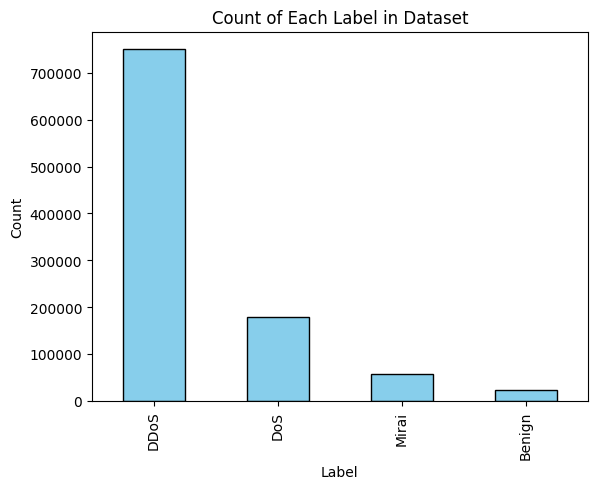

In [20]:
label_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Each Label in Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

## Model Building

In [21]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.7 MB/s eta 0:01:29
   ---------------------------------------- 1.0/150.0 MB 2.0 MB/s eta 0:01:14
   ---------------------------------------- 1.6/150.0 MB 2.0 MB/s eta 0:01:13
    --------------------------------------- 2.1/150.0 MB 2.2 MB/s eta 0:01:09
    --------------------------------------- 2.6/150.0 MB 2.3 MB/s eta 0:01:06
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0:01:03
    --------------------------------------- 3.7/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 4.2/150.0 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 4.7/150.0 MB 2.4 MB/s eta 0:01:01
   - -------------------------------------- 5.2/150.0 MB 2.5 MB/s eta 0:01:00
   - -------------------------------------- 5.8/150.0 MB 2.5 MB/s eta 0:00:59


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

### 1) Random Forest Function

In [23]:
pca = PCA(n_components=0.95)
sc = StandardScaler()
def space_optimized(X_train: np.ndarray):
    if not isinstance(X_train, np.ndarray):
        raise ValueError("Input X_train must be a NumPy array.")

    if X_train.ndim == 1:
        X_train=X_train.astype('int8')
        return X_train
    
    global sc
    scaled_data = sc.fit_transform(X_train)

    #--> Datatype precision decrement 
    scaled_data=scaled_data.astype('float16')
    
    #--> PCA
    global pca
    principal_components = pca.fit_transform(scaled_data)

    pca_df = pd.DataFrame(data=principal_components)
    return pca_df

In [24]:
def random_forest(X_train,y_train,class_weight=None):
    cw=class_weight if class_weight is not None else 'balanced'
    model=RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, class_weight=cw, n_jobs=-1)
    model.fit(X_train,y_train)
    return model

In [25]:
def random_forest_opt(X_train,y_train,class_weight=None):
    X_train=space_optimized(X_train)
    y_train=space_optimized(y_train)
    cw=class_weight if class_weight is not None else 'balanced'
    model=RandomForestClassifier(n_estimators=50, random_state=42, verbose=1, class_weight=cw, n_jobs=-1)
    model.fit(X_train,y_train)
    return model

### 2) SVM

In [26]:
def svm(X_train,y_train,class_weight=None):
    cw=class_weight if class_weight is not None else 'balanced'
    model=SVC(random_state=42,class_weight=cw,n_jobs=-1)
    model.fit(X_train,y_train)
    return model

In [27]:
def svm_opt(X_train,y_train,class_weight=None):
    X_train=space_optimized(X_train)
    y_train=space_optimized(y_train)
    cw=class_weight if class_weight is not None else 'balanced'
    model=SVC(random_state=42,class_weight=cw,n_jobs=-1)
    model.fit(X_train,y_train)
    return model

### 3) XGBoost

In [28]:
def Xgboost(X_train, y_train,sample_weights=None):
    xgb_model=XGBClassifier(objective='multi:softmax', num_class=4, n_jobs=-1, use_label_encoder=False)
    xgb_model.fit(X_train, y_train, sample_weight=sample_weights)
    return xgb_model

In [29]:
def Xgboost_opt(X_train, y_train,sample_weights=None):
    X_train=space_optimized(X_train)
    y_train=space_optimized(y_train)
    xgb_model=XGBClassifier(objective='multi:softmax', num_class=4, n_jobs=-1, use_label_encoder=False)
    xgb_model.fit(X_train, y_train, sample_weight=sample_weights)
    return xgb_model

## Model Training

In [30]:
X=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42, stratify=y)

X_train.shape, y_test.shape

((506527, 46), (506527,))

In [31]:
pd.DataFrame(y_train).value_counts()

0
0    374772
1     89900
2     29617
3     12238
Name: count, dtype: int64

In [32]:
pd.DataFrame(y_test).value_counts()

0
0    374772
1     89901
2     29616
3     12238
Name: count, dtype: int64

In [33]:
def generate_classification_report(model, X_test, y_test):
    start_t=time.time()
    y_pred = model.predict(X_test)
    end_t=time.time()
    report = classification_report(y_test, y_pred)
    print(report)
    print(f"Time taken for model to predict is {end_t-start_t}")

In [34]:
def generate_classification_report_opt(model, X_test, y_test):
    global pca
    global sc
    scaled_data=sc.transform(X_test)
    scaled_data=scaled_data.astype('float16')
    pca_op=pca.transform(scaled_data)
    pca_x_train=pd.DataFrame(data=pca_op)
    y_test=y_test.astype('int8')
    start_t=time.time()
    y_pred = model.predict(pca_x_train)
    end_t=time.time()
    report = classification_report(y_test,y_pred)
    print(report)
    print(f"Time taken for model to predict is {end_t-start_t}")

In [36]:
def generate_classification_report_opt_tf(model, X_test, y_test):
    global pca
    global sc
    scaled_data=sc.transform(X_test)
    scaled_data=scaled_data.astype('float16')
    pca_op=pca.transform(scaled_data)
    pca_x_train=pd.DataFrame(data=pca_op)
    y_test=y_test.astype('int8')
    start_t=time.time()
    y_pred_probs = model.predict(pca_x_train)
    end_t=time.time()
    y_pred = np.argmax(y_pred_probs, axis=1)
    report = classification_report(y_test,y_pred)
    print(report)
    print(f"Time taken for model to predict is {end_t-start_t}")

In [37]:
def generate_classification_report_tf(model, X_test, y_test):
    global sc_ann
    scaled_data=sc_ann.transform(X_test)
    start_t=time.time()
    y_pred_probs = model.predict(scaled_data)
    end_t=time.time()
    y_pred = np.argmax(y_pred_probs, axis=1)
    report = classification_report(y_test,y_pred)
    print(report)
    print(f"Time taken for model to predict is {end_t-start_t}")

In [38]:
from sklearn.utils.class_weight import compute_class_weight

def compute_class_weights(y_train):
    if isinstance(y_train, pd.Series):
        y_train = y_train.to_numpy()
    
    classes = np.unique(y_train)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weights = dict(zip(classes, weights.astype('float16')))
    
    return class_weights

class_weights=compute_class_weights(y)
class_weights

{0: 0.338, 1: 1.408, 2: 4.277, 3: 10.34}

In [39]:
rf_model=random_forest(X_train,y_train,class_weight=class_weights)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.6s finished


In [40]:
rf_model_opt=random_forest_opt(X_train,y_train,class_weight=class_weights)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.3s finished


In [41]:
generate_classification_report(rf_model, X_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    374772
           1       1.00      1.00      1.00     89901
           2       1.00      1.00      1.00     29616
           3       1.00      1.00      1.00     12238

    accuracy                           1.00    506527
   macro avg       1.00      1.00      1.00    506527
weighted avg       1.00      1.00      1.00    506527

Time taken for model to predict is 1.4198520183563232


In [42]:
generate_classification_report_opt(rf_model_opt, X_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.98    374772
           1       0.95      0.91      0.93     89901
           2       1.00      0.99      1.00     29616
           3       1.00      1.00      1.00     12238

    accuracy                           0.98    506527
   macro avg       0.98      0.97      0.98    506527
weighted avg       0.98      0.98      0.98    506527

Time taken for model to predict is 0.9143447875976562


In [43]:
sample_weights = np.array([class_weights[class_label] for class_label in y_train])
sample_weights

array([0.338, 0.338, 0.338, ..., 1.408, 0.338, 1.408], dtype=float16)

In [44]:
xbg_model=Xgboost(X_train, y_train,sample_weights=sample_weights)

C:\Users\91821\OneDrive\Documents\8th sem\major_prj_code\ddos_simulator\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [45]:
xbg_model_opt=Xgboost_opt(X_train, y_train,sample_weights=sample_weights)

C:\Users\91821\OneDrive\Documents\8th sem\major_prj_code\ddos_simulator\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
generate_classification_report(xbg_model, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    374772
           1       1.00      1.00      1.00     89901
           2       1.00      1.00      1.00     29616
           3       1.00      1.00      1.00     12238

    accuracy                           1.00    506527
   macro avg       1.00      1.00      1.00    506527
weighted avg       1.00      1.00      1.00    506527

Time taken for model to predict is 0.6873476505279541


In [47]:
generate_classification_report_opt(xbg_model_opt, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    374772
           1       0.81      0.97      0.88     89901
           2       0.99      1.00      1.00     29616
           3       1.00      1.00      1.00     12238

    accuracy                           0.95    506527
   macro avg       0.95      0.98      0.96    506527
weighted avg       0.96      0.95      0.96    506527

Time taken for model to predict is 0.8735766410827637


In [48]:
import joblib

In [49]:
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(xbg_model, "xgb_model.pkl")

['xgb_model.pkl']